# COVID19 test result analysis for counties in NY State

In [83]:
# COVID19 test results in counties in NY State

# Code development:
# Oliver Elison Timm
# Alex Mitchell
# Fangze Zhu
# and students in ATM/ENV 315 course, UAlbany spring 2020


In [84]:
import certifi
import urllib3
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt


def get_county_names():
    
    """support function that extracts the names of the counties from the data source
    
    Returns:
        counties: list with the county names (strings)
    
    """
    data_source="https://health.data.ny.gov/resource/xdss-u53e.json"
    test=False # no print statements (unless error)
    order_old_to_new= True # change the order of the data to rows going from oldest (first row) to latest date

    try:
        http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
        received = http.request('GET', data_source)
        result_json_fmt=received.data.decode('utf-8') # returns a dictionary
        content =  json.loads(result_json_fmt)

    except:
        print ("Something went wrong while connecting to "+data_source)             

    counties = []

    for i in np.arange(0,62,1):
        counties.append((str((content[i]['county']))))
    
    return counties

def get_test_data_ny(county):
    
    """sends request to data server and gets latest COVID19 test results
    
    Input parameter:
        county (string): name of the county you want to get data from.
        
    Returns:
        1-d array with dates and 
        2-d numpy array with data arranged in columns:
        0: new_positives
        1: cumulative_number_of_positives
        2: total_number_of_tests
        3: cumulative_number_of_tests
        Each day is stored in a row
    """
    
    data_source="https://health.data.ny.gov/resource/xdss-u53e.json"
    data_query="?county="+county
    test=False # no print statements (unless error)
    order_old_to_new= True # change the order of the data to rows going from oldest (first row) to latest date
    
    try: 
        if test:
            print("contact server "+data_source)
            print("with query "+data_query)
            print("...")
        http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
        received = http.request('GET', data_source+data_query)
        result_json_fmt=received.data.decode('utf-8') # returns a dictionary
        content =  json.loads(result_json_fmt)
        if test:
            print("done")
    except:
        print ("Something went wrong while connecting to "+data_source)
        print ("request made: "+data_request)

    if test:
        print (type(content[0]))
        print (content[0].keys())

    # list comprehension done here
    # convert date string into datetime object and put all in a list
    datelist=[dt.datetime.strptime(item['test_date'][0:10],"%Y-%m-%d") for item in content]
    ntime=len(datelist)
    

    time=np.array(datelist,dtype=np.datetime64)

    # convert list with datetime into numpy array 
    data_name=['new_positives','cumulative_number_of_positives','total_number_of_tests','cumulative_number_of_tests']
    nrow=ntime 
    ncol=len(data_name)+1
    dummy=-99
    x=np.zeros(shape=[nrow,ncol])+dummy # so we can see if there were gaps in the data for some reason
    
    # list comprehension and conversion of list into numpy array with values
    k=0 # start with column 1 for the test data, column 0 is the date 
    for name in data_name:
        listbuffer=[ item[name] for item in content]
        x[:,k]=np.array(listbuffer,dtype=int)
        k=k+1
    return time,x


In [85]:


# we call the function to get all county names that are in the data base
counties=get_county_names()

for i,c in enumerate(counties):
    print (i,c)


0 Albany
1 Allegany
2 Bronx
3 Broome
4 Cattaraugus
5 Cayuga
6 Chautauqua
7 Chemung
8 Chenango
9 Clinton
10 Columbia
11 Cortland
12 Delaware
13 Dutchess
14 Erie
15 Essex
16 Franklin
17 Fulton
18 Genesee
19 Greene
20 Hamilton
21 Herkimer
22 Jefferson
23 Kings
24 Lewis
25 Livingston
26 Madison
27 Monroe
28 Montgomery
29 Nassau
30 New York
31 Niagara
32 Oneida
33 Onondaga
34 Ontario
35 Orange
36 Orleans
37 Oswego
38 Otsego
39 Putnam
40 Queens
41 Rensselaer
42 Richmond
43 Rockland
44 Saratoga
45 Schenectady
46 Schoharie
47 Schuyler
48 Seneca
49 Steuben
50 St. Lawrence
51 Suffolk
52 Sullivan
53 Tioga
54 Tompkins
55 Ulster
56 Warren
57 Washington
58 Wayne
59 Westchester
60 Wyoming
61 Yates


##  Plotting the test results
### Ten members for upstate counties and ten downstate counties


In [104]:
counties_upstate=['Albany','Clinton','Essex','Franklin','Herkimer',
                  'Ontario','Rensselaer','Saratoga','St. Lawrence','Wyoming']

counties_downstate=['Bronx','Dutchess','Nassau','Orange','Putnam',
                    'Rockland','Sullivan','Suffolk','Ulster','Westchester']



In [105]:
# allow us to use a nice color set for plotting our stations
# https://kite.com/python/answers/how-to-use-a-colormap-to-set-the-color-of-lines-in-a-matplotlib-line-graph-in-python

evenly_spaced_interval = evenly_spaced_interval = np.linspace(0, 1, len(counties_upstate))
colors_upstate = [plt.cm.cool(x) for x in evenly_spaced_interval]

evenly_spaced_interval = evenly_spaced_interval = np.linspace(0, 1, len(counties_downstate))
colors_downstate = [plt.cm.Reds(x) for x in evenly_spaced_interval]


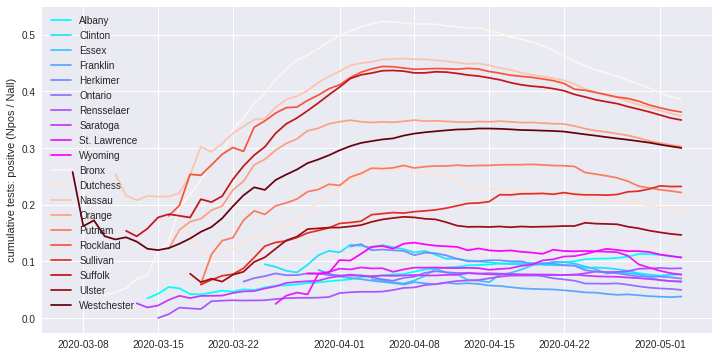

In [106]:

fig=plt.figure(figsize=[12,6])
# percentage of positive tests in the cumulative tests in upstate counties
i=0
for county in counties_upstate:
    #print("plot county "+county)
    time,x=get_test_data_ny(county)
    # find rows with cumulative positives > 1
    iuse=x[:,3]>100
    plt.plot(time[iuse],x[iuse,1]/x[iuse,3],color=colors_upstate[i],label=county)
    i=i+1

# percentage of positive tests in the cumulative tests in upstate counties
i=0
for county in counties_downstate:
    #print("plot county "+county)
    time,x=get_test_data_ny(county)
    # find rows with cumulative positives > 1
    iuse=x[:,3]>100
    plt.plot(time[iuse],x[iuse,1]/x[iuse,3],color=colors_downstate[i],label=county)
    i=i+1   

plt.legend()
plt.ylabel("cumulative tests: positve (Npos / Nall)")
plt.show()



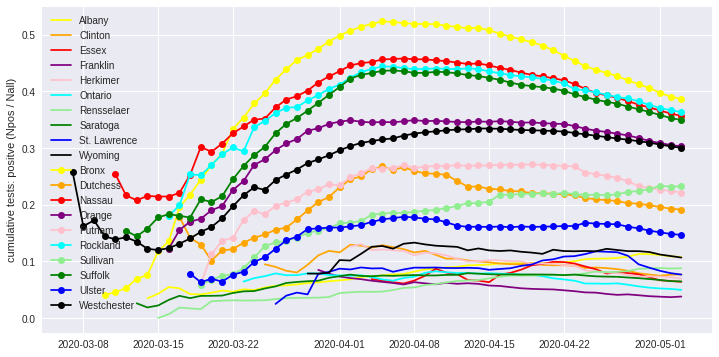

In [107]:
# a simpler but acceptable solution
# create your own colorlists
# and use + and  x to mark the two groups
colors_upstate= ['yellow','orange','red','purple','pink','cyan','lightgreen','green','blue','black']
colors_downstate= ['yellow','orange','red','purple','pink','cyan','lightgreen','green','blue','black']
fig=plt.figure(figsize=[12,6])
# percentage of positive tests in the cumulative tests in upstate counties
i=0
for county in counties_upstate:
    #print("plot county "+county)
    time,x=get_test_data_ny(county)
    # find rows with cumulative positives > 1
    iuse=x[:,3]>100
    plt.plot(time[iuse],x[iuse,1]/x[iuse,3],marker='x',color=colors_upstate[i],label=county)
    i=i+1

# percentage of positive tests in the cumulative tests in upstate counties
i=0
for county in counties_downstate:
    #print("plot county "+county)
    time,x=get_test_data_ny(county)
    # find rows with cumulative positives > 1
    iuse=x[:,3]>100
    plt.plot(time[iuse],x[iuse,1]/x[iuse,3],marker='o',color=colors_downstate[i],label=county)
    i=i+1   

plt.legend()
plt.ylabel("cumulative tests: positve (Npos / Nall)")
plt.show()



# Research tasks for teams:
    
We want to test the hypothesis that the upstate counties have a significantly lower percentage positive test rate than the downstate counties. 


__(1) Decide in your team, which of the three plotted quanities gives you the best metric to compare the positive tests results among counties?__

 - (A) total number of cumulative positives
 - (B) daily number of positives divided by daily number of all tests (all= positive + negative)
 - (C) using the cumulative positive divided by cumulative total test numbers
 - (D) Another metric that your team suggests 


__(2) Visit the NYSDOH COVID-19 Tracker web page and explore which county have less than 10 percent positive tests currently, and in which region do you find counties with more than 30 percent positive tests.__

__(3) Create a list with 10 upstate counties away from the epicenter, and ten downstate counties inside or close to the epicenter (epicenter: New York City region).__

__(4) Update the scripts so that you can generate the plot showing the time series for upstate and downstate counties.  Use easy to identify line styles or markers symbols in the plots for the two county groups.__

__(5) For the latest date in the data, calculate for the two county groups the average positve test percentage rate, and 95% confidence intervals.__



In [108]:
# Calculation of the 95% confidence intervals
from scipy.stats import t



n1=len(counties_downstate)
n2=len(counties_upstate)
data1=np.zeros(n1)
data2=np.zeros(n2)

# get the date into a string
datestring=np.datetime_as_string(time[0])
datestring=datestring[0:10]

print ("Upstate counties positive percentage rate on "+datestring) 
for i,county in enumerate(counties_upstate):
    time,x=get_test_data_ny(county)
    data1[i]=x[0,1]/x[0,3] # first item is the latest value
    print("%2d %12s %8.2f%%" %( i,county, data1[i]*100))

print ("")
print ("Downstate counties positive percentage rate on "+datestring)    
for i,county in enumerate(counties_downstate):
    time,x=get_test_data_ny(county)
    data2[i]=x[0,1]/x[0,3] # first item is the latest value
    print("%2d %12s %8.2f%%" %( i,county, data2[i]*100))


Upstate counties positive percentage rate on 2020-05-03
 0       Albany    10.77%
 1      Clinton     7.68%
 2        Essex     6.39%
 3     Franklin     3.78%
 4     Herkimer     6.96%
 5      Ontario     4.96%
 6   Rensselaer     8.78%
 7     Saratoga     6.45%
 8 St. Lawrence     7.66%
 9      Wyoming    10.66%

Downstate counties positive percentage rate on 2020-05-03
 0        Bronx    38.65%
 1     Dutchess    19.14%
 2       Nassau    35.67%
 3       Orange    30.27%
 4       Putnam    22.15%
 5     Rockland    36.36%
 6     Sullivan    23.22%
 7      Suffolk    34.94%
 8       Ulster    14.66%
 9  Westchester    30.02%


In [109]:
m1,s1=np.mean(data1), np.std(data1)
m2,s2=np.mean(data2), np.std(data2)

se1=s1/np.sqrt(n1)
se2=s2/np.sqrt(n2)

print (80*"=")
print ("Summary statistics for day "+datestring)
print (80*"=")


# lookup the t-value in the t-distribution for 95% confidence interval
# t-distribution is symmetric w.r.t., so 2.5% and 97.5% quantiles have 
# same absolute value just with opposite signs

t1 = t.ppf(0.975,df=n1-1)
ci1 = t1*se1

t2 = t.ppf(0.975,df=n2-1)
ci2 = t2*se2

print ("The latest mean values in upstate and downstate county groups:")
print ("upstate   mean with 95%% confidence interval: %4.2f [%4.2f - %4.2f]" % (m1,m1-ci1,m1+ci1))
print ("downstate mean with 95%% confidence interval: %4.2f [%4.2f - %4.2f]" % (m2,m2-ci2,m2+ci2))



Summary statistics for day 2020-05-03
The latest mean values in upstate and downstate county groups:
upstate   mean with 95% confidence interval: 0.07 [0.06 - 0.09]
downstate mean with 95% confidence interval: 0.29 [0.23 - 0.34]


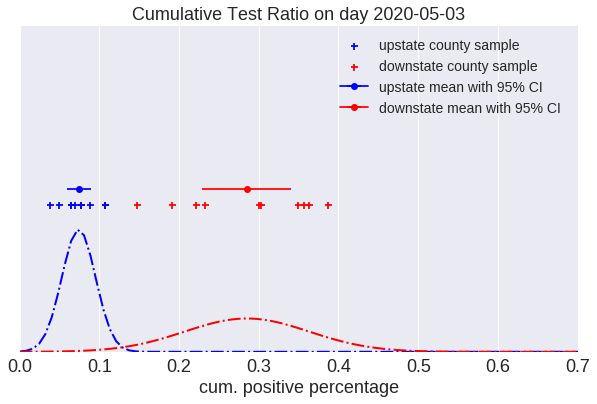

In [110]:
plt.style.use('seaborn')
plt.figure(figsize=[10,6])

#plt.plot(1,m1,marker='o',label='upstate',markersize=10,color='blue')
ypos1,ypos2 = 0.5 , 0.5 # help positions for the y-axis location of the two samples
plt.errorbar(m1,ypos1,xerr=ci1,marker='o',capsize=5,color='blue',label='upstate mean with 95% CI')
plt.errorbar(m2,ypos2,xerr=ci2,marker='o',capsize=5,color='red',label='downstate mean with 95% CI ')
yhelp1=np.zeros(n1)+ypos1-0.05
yhelp2=np.zeros(n2)+ypos2-0.05
plt.scatter(data1,yhelp1,marker='+',color='blue',label='upstate county sample')
plt.scatter(data2,yhelp2,marker='+',color='red',label='downstate county sample')
# add the + markers for individual counties
plt.ylim(0,1)
plt.xlim(0,0.5)
plt.yticks([])
plt.xticks(np.arange(0,0.8,0.1),fontsize=18)
plt.xlabel("cum. positive percentage",fontsize=18)
plt.title("Cumulative Test Ratio on day "+datestring,fontsize=18)
plt.legend(fontsize=14)
plt.grid(color='white')

plt.show()

## Apply the t-test:



In [112]:
from scipy.stats import ttest_ind

result=ttest_ind(data1,data2,equal_var=False)

t,p=ttest_ind(data1,data2,equal_var=False)

print ("the two-tailed t-test returned the P-value: %8.6f" % (p))

the two-tailed t-test returned the P-value: 0.000012


---

### Some 'parked' code here for demonstrative purposes



In [ ]:
# Illustrative plots for the Gaussian PDF curves for the two samples.
from scipy.stats import norm

xhelp=np.linspace(0,0.8,100)
y1=norm.pdf(xhelp,loc=m1,scale=s1)
y2=norm.pdf(xhelp,loc=m2,scale=s2)
plt.plot(xhelp,y1/50,color='blue',linewidth=2, linestyle='-.')
plt.plot(xhelp,y2/50,color='red',linewidth=2, linestyle='-.')

In [81]:
# insert this code to pick more or less random in geographic location counties by alphabetic order.

# our sample size is 10, but we could decide to add or remove counties from our list
# so we make this depending on the list with county names
# lest just pick the first ten and then the 11-20th from the alphabetic listed counties
counties_downstate=counties[0:10]
counties_upstate=counties[10:20]

In [ ]:
from scipy.stats import norm

xhelp=np.linspace(0,0.8,100)
y1=norm.pdf(xhelp,loc=m1,scale=s1)
y2=norm.pdf(xhelp,loc=m2,scale=s2)
plt.plot(xhelp,y1/50,color='blue',linewidth=2, linestyle='-.')
plt.plot(xhelp,y2/50,color='red',linewidth=2, linestyle='-.')

References:
- [NY COVID19 tracker](https://covid19tracker.health.ny.gov/views/NYS-COVID19-Tracker/NYSDOHCOVID-19Tracker-Map?%3Aembed=yes&%3Atoolbar=no&%3Atabs=n)
- [Data access source](https://dev.socrata.com/foundry/health.data.ny.gov/xdss-u53e)